In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Librerías de tratamiento de datos (las principales)
import pandas as pd
import numpy as np
import missingno as msno


# Librerías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns
# complementa algunas visualizaciones
%matplotlib inline
# apply some cool styling
sns.set(color_codes=True)

# Instalación de librería estadística
from scipy import stats
from scipy.stats import norm


# Librerías de advertencias
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BA1/data_store.csv",sep=",",encoding="latin-1")


# Prepocesamiento de la data
## Variable Objetivo: Profit

### Eliminación de columnas innecesarías

In [ ]:
# Se eliminan las columnas que no se usarán (drop)
df = df.drop(['Customer ID','Customer Name', 'Order ID', 'Country', 'Postal Code', 'Product ID'],axis=1)

### Renombrado de columnas

In [ ]:
df.ship_mode.value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: ship_mode, dtype: int64

In [ ]:
# Se eliminan los duplicados si es que existen
df = df.drop_duplicates()

In [ ]:
# Se cambia de tipo de dato int a string para evitar incurrir en errores de análisis cuantitativos
df['row_id'] = df['row_id'].astype(str)

### Asignación de segmentos
1. Vamos a asignar una categoría según el valor de las ventas/profit
2. Vamos a crear una nueva columna llamada "Segmento"
3. A través de un ciclo for y el uso de ifelse vamos a asignar la categoría

In [ ]:
# Calcula el promedio de sales y profit
prom_sales = df.sales.mean()
prom_profit = df.profit.mean()

# Crea una lista para almacenar los segmentos
segmento = []

# Itera a través de las filas del DataFrame
for index, row in df.iterrows():
    if row['sales'] < prom_sales and row['profit'] < prom_profit:
        segmento.append('bajo_bajo')
    elif row['sales'] < prom_sales and row['profit'] > prom_profit:
        segmento.append('bajo_alto')
    elif row['sales'] > prom_sales and row['profit'] < prom_profit:
        segmento.append('alto_bajo')
    elif row['sales'] > prom_sales and row['profit'] > prom_profit:
        segmento.append('alto_alto')
    else:
        segmento.append('otros')  # Manejo de casos que no cumplen ninguna condición

# Agrega la columna 'segmento' al DataFrame
df['segmento'] = segmento

## Análisis Univariado
* Analizar los tipos de distribución de las variables numéricas.
* Use estadística descriptiva
* Probar distribución normal. Investigar los test y scripts para desarrollar esto.
* Recomiendo revisar la librería Scipy y los gráficos de distribución de Seaborn y Matplotlib
  * Link: https://scipy.org/
* Investigar sobre los test de normalidad y su implementación en Python
  * Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
* Investigar sobre pruebas para variables categoricas y su implementación en Python
  * Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
* Investigar sobre pruebas para variables numéricas (t-test) y su implementación en Python
  * Link: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# Finanzas (2ptos)
### Que ciudades son las que tiene mejor Profit
1. Rentabilidad entre categorías. Evidencia estadística
2. Rentabilidad entre segmentos. Hay diferencia estadística

In [ ]:
# Rentabilidad entre categorías

categories = df["category"].unique()

for cat in categories:
  df_cat = pd.DataFrame()
  df_cat = df[df["category"] == cat]
  df_cat = df_cat.groupby(["city"], as_index = False)["profit"].sum()
  if cat == "Furniture":
    df_furniture = df_cat.sort_values(by = ["profit"], ascending = False)
  elif cat == "Office Supplies":
    df_osupplies = df_cat.sort_values(by = ["profit"], ascending = False)
  else:
    df_tech = df_cat.sort_values(by = ["profit"], ascending = False)

In [ ]:
# Furniture

df_furniture.head(5)

,city,profit
316,Seattle,6208.8182
232,New York City,5306.6915
87,Detroit,3332.6748
184,Los Angeles,3071.5913
137,Henderson,2239.9673


In [ ]:
# Office supplies

df_osupplies.head(5)

,city,profit
298,New York City,20624.7864
241,Los Angeles,13460.6287
409,Seattle,9915.4303
395,San Francisco,9621.2494
115,Detroit,7884.6422


In [ ]:
# Technology

df_tech.head(5)

,city,profit
213,New York City,36105.5058
175,Los Angeles,13908.5379
291,Seattle,13031.8482
157,Lafayette,8691.4088
283,San Francisco,6394.7550


Hay tres ciudades que están entre los 5 más rentable ciudades en todos categorías: New York City, Los Angeles y Seattle. Detroit y San Fransisco están entre los 5 ciudades más rentables en dos categorías, Lafayette y Henderson en una categoría.

In [ ]:
# Rentabilidad entre segmentos

segments = df["segment"].unique()
segments

for seg in segments:
  df_seg = pd.DataFrame()
  df_seg = df[df["segment"] == seg]
  df_seg = df_seg.groupby(["city"], as_index = False)["profit"].sum()
  if seg == "Consumer":
    df_consumer = df_seg.sort_values(by = ["profit"], ascending = False)
  elif seg == "Corporate":
    df_corporate = df_seg.sort_values(by = ["profit"], ascending = False)
  else:
    df_hoffice = df_seg.sort_values(by = ["profit"], ascending = False)

In [ ]:
# Consumer

df_consumer.head(5)

,city,profit
261,New York City,30618.8441
211,Los Angeles,16508.7529
363,Seattle,16389.6527
352,San Francisco,9386.6110
92,Detroit,8536.5258


In [ ]:
# Corporate

df_corporate.head(5)

,city,profit
209,New York City,14084.7411
149,Lafayette,8836.5701
290,Seattle,8653.2590
168,Los Angeles,7353.0489
282,San Francisco,6134.7100


In [ ]:
# Home office

df_hoffice.head(5)

,city,profit
160,New York City,17333.3985
131,Los Angeles,6578.9561
190,Providence,5359.7931
224,Seattle,4113.1850
106,Jackson,2666.4277


Hay tres ciudades que están entre las 5 más rentable ciudades en todos segmentos: New York City, Los Angeles y Seattle (las mismas que en las categorías). San Francisco está entre las 5 más rentable ciudades en dos segmentos (la misma en las categorías), y Providence, Jackson, Lafayette y Detroit en un segmento.

# Operaciones (2ptos)
### Cuales son los state que tiene mayor nivel de ventas
1. A que estados estamos enviando más? Evidencia estadística
2. Diferencia entre segmentos. Hay diferencia estadística


In [ ]:
# A cuales estados han enviado más

table_sales = pd.crosstab(df.state, columns = "num_of_sales").sort_values(by = "num_of_sales", ascending = False)
table_sales.head(5)

col_0,num_of_sales
state,
California,2001
New York,1128
Texas,985
Pennsylvania,587
Washington,506


In [ ]:
# Consumer

df_consumer = df[df["segment"] == "Consumer"]

table_consumer = pd.crosstab(df_consumer.state, columns = "num_of_sales").sort_values(by = "num_of_sales", ascending = False)
table_consumer.head(5)

col_0,num_of_sales
state,
California,1048
New York,643
Texas,524
Pennsylvania,284
Illinois,276


In [ ]:
# Corporate

df_corporate = df[df["segment"] == "Corporate"]

table_corporate = pd.crosstab(df_corporate.state, columns = "num_of_sales").sort_values(by = "num_of_sales", ascending = False)
table_corporate.head(5)

col_0,num_of_sales
state,
California,618
New York,321
Texas,312
Pennsylvania,196
Florida,136


In [ ]:
# Home office

df_hoffice = df[df["segment"] == "Home Office"]

table_hoffice = pd.crosstab(df_hoffice.state, columns = "num_of_sales").sort_values(by = "num_of_sales", ascending = False)
table_hoffice.head(5)

col_0,num_of_sales
state,
California,335
New York,164
Texas,149
Pennsylvania,107
Washington,100


California, New York, Texas y Pennsylvania están entre las 5 más rentables ciudades en todos segmentos. Washington, Florida y Illinois en un segmento.

# Comercial (2ptos)
## Cuales son las categorías de productos más rentables
1. Hay diferencias entre categorías? (estadística)
2. En que estados se presentan estas diferencias
3. En que categorías se detectaron los mayores descuentos

In [ ]:
# Beneficio por categoría

df_categories_profit = df.groupby(["category"], as_index = False)["profit"].sum().sort_values(by = "profit", ascending = False)
df_categories_profit

,category,profit
2,Technology,145454.9481
1,Office Supplies,122490.8008
0,Furniture,18451.2728


<Axes: xlabel='profit', ylabel='category'>

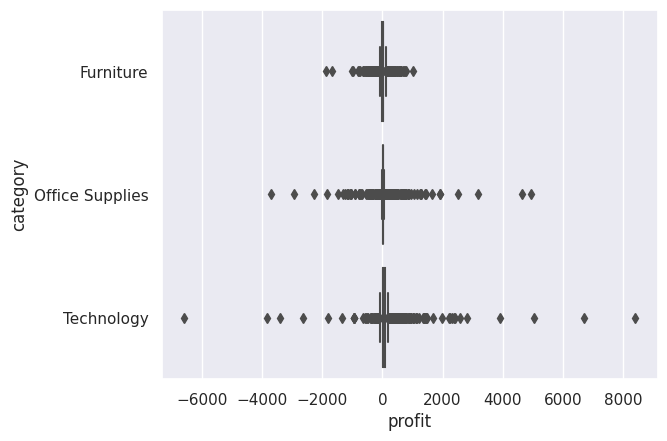

In [ ]:
sns.boxplot(data = df, x = "profit", y = "category")

In [ ]:
# Número de ventas por categoría

df_categories_count = df.groupby(["category"], as_index = False)["sales"].count().sort_values(by = "sales", ascending = False)
df_categories_count

,category,sales
1,Office Supplies,6026
0,Furniture,2121
2,Technology,1847


In [ ]:
# Rentabilidad media por venta

df_categories = df_categories_profit
df_categories["num_of_sales"] = df_categories_count["sales"]
df_categories["profit/sales"] = df_categories["profit"]/df_categories["num_of_sales"]
df_categories

,category,profit,num_of_sales,profit/sales
2,Technology,145454.9481,1847,78.752002
1,Office Supplies,122490.8008,6026,20.327050
0,Furniture,18451.2728,2121,8.699327


1. Hay diferencias entre categorías? (estadística)

* La categoría "Technology" tiene mayor beneficio monetario y mayor beneficio por venta
* La categoría "Technology" también tiene la mayor diferencía entre las ventas más y menos rentables - tiene la mayor variancia
* La categoría menos rentable tanto en términos de beneficio monetario y beneficio por ventas es "Furniture" - la categoría tiene más ventas que "Office Supplies" pero menos beneficio










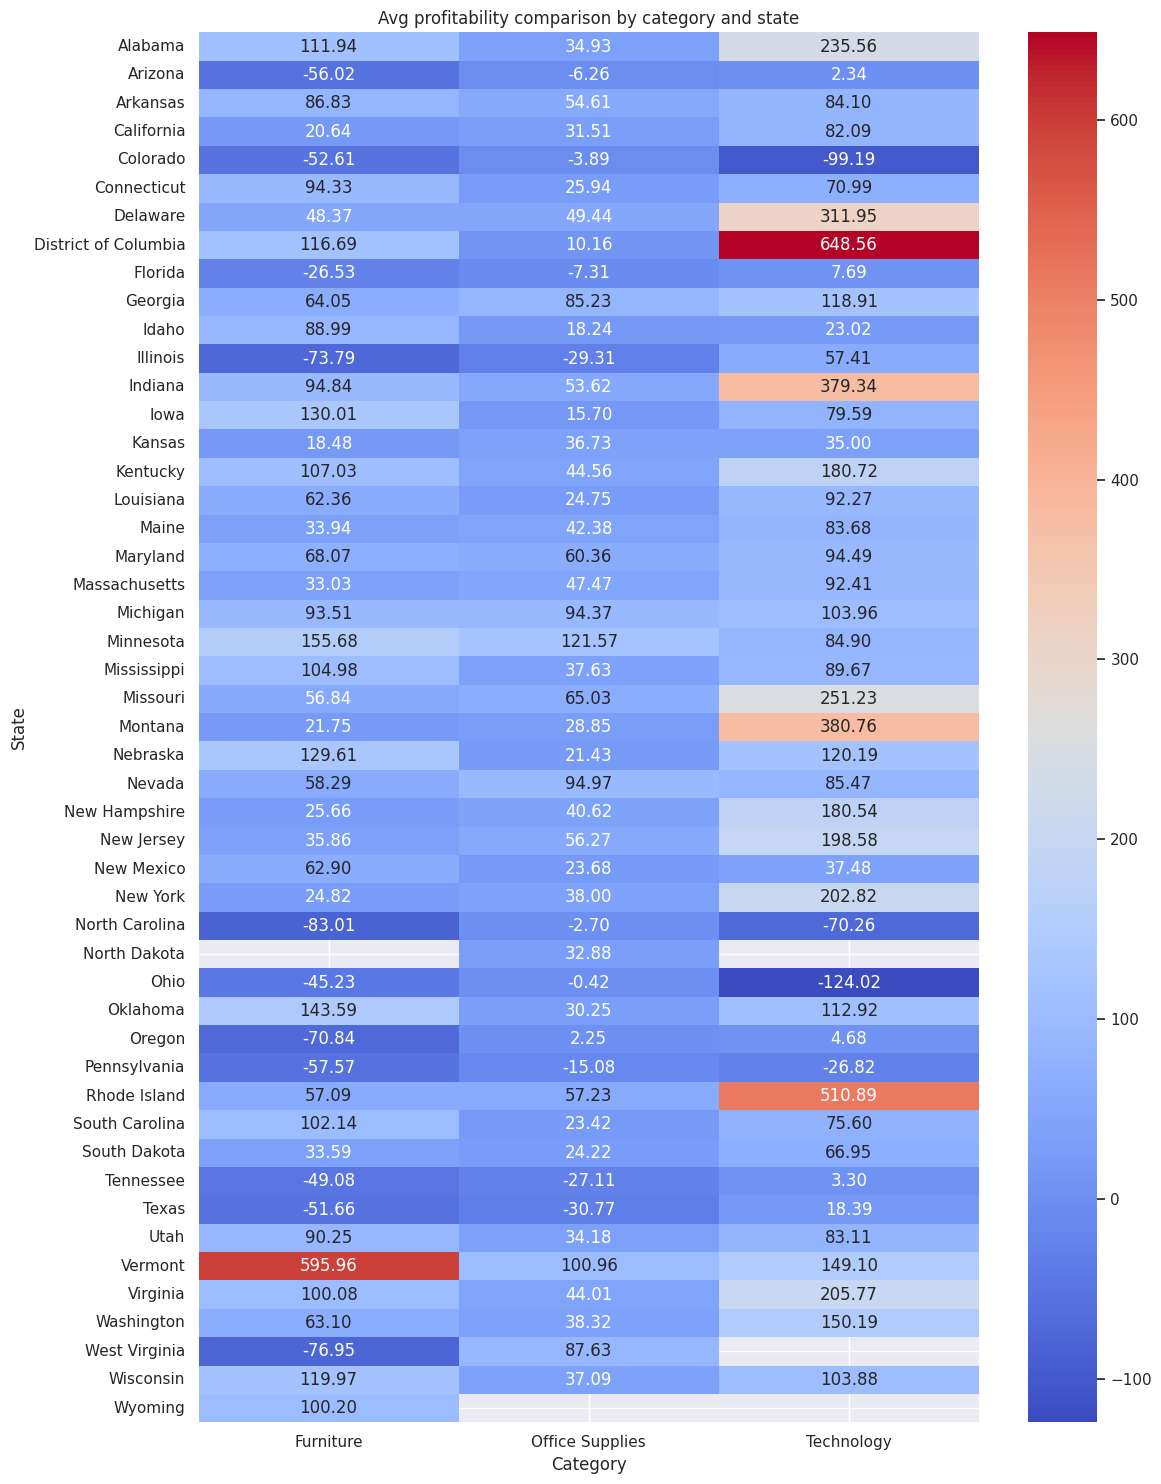

In [ ]:
avg_profit_by_category = df.groupby(["state", "category"])["profit"].mean().reset_index()

pivot_avg_profit = avg_profit_by_category.pivot_table(values = "profit", index = "state", columns = "category")

plt.figure(figsize = (12, 15))
sns.heatmap(pivot_avg_profit, annot = True, cmap = "coolwarm", fmt = ".2f")

plt.xlabel("Category")
plt.ylabel("State")
plt.title("Avg profitability comparison by category and state")

plt.tight_layout()
plt.show()

2. En que estados se presentan estas diferencias?

* Furniture: hay muchos estados, en cuales rentabilidad media es menos cero - las estados menos rentables son North Carolina, West Virginia y Illinois y solo hay un estado en que la rentabilidad medio es más que 200 (Vermont)
* Office supplies: No hay mucho variancia en la rentabilidad entre los estados. La mayor rentabilidad medio es 121.57 (Minnesota) y la peor rentabilidad medio es -30.77 (Texas). No hay estados que tienen una rentabilidad muy alto, pero también no hay estados que tienen una rentabilidad muy bajo
* Technology: eso categoría hay más estados con una rentabilidad medio alto, hay 6 estados en cuales la rentabilidad medio es más que 250 (Rhode Island, Montana, Missouri, Indiana, District of Columbia y Delaware). También hay tres estados en cuales la rentabilidad medio es menos de -70 (Ohio, North Carolina y Colorado)
* Si un estado tiene una rentabilidad baja en una categoría, es probable que también tenga una rentabilidad bastante baja en las otras categorías: los estados rentables tienen una rentabilidad alta en todas las categorías y los estados no rentables tienen una rentabilidad baja en todas las categorías.

In [ ]:
# Promedio de descuento por cada categoría

df_categories_discount = df.groupby(["category"], as_index = False)["discount"].mean().sort_values(by = "discount", ascending = False)
df_categories_discount

,category,discount
0,Furniture,0.173923
1,Office Supplies,0.157285
2,Technology,0.132323


<Axes: xlabel='discount', ylabel='category'>

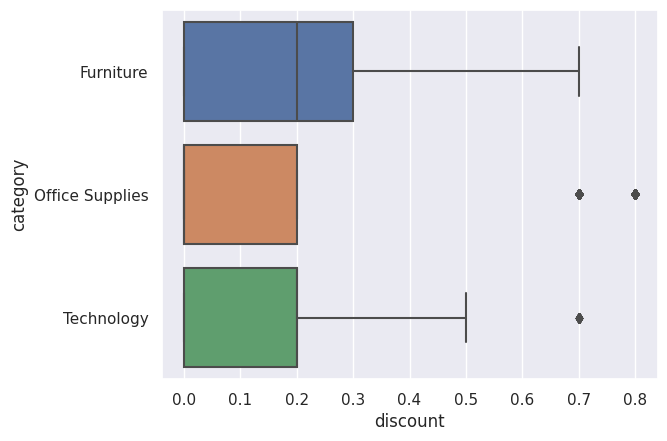

In [ ]:
# Distribución de descuentos en cada categoría

sns.boxplot(data = df, x = "discount", y = "category")

* El promedio de descuento es más alto en la categoría "Furniture"
* También la categoría "Furniture" tiene la mayor variancia de descuentos entre todas las categorías

# Conclusiones (3ptos)
***ATENCIÓN***
* Las conclusiones deben incluír las métricas investigadas en los análisis que se realizaron
* Se probará su script para que el código sea reproducible

1. Que conclusiones podemos sacar de este análisis?
* La categoría "Technology" es la más rentable y la categoría "Furniture" la menos rentable.
* Hay diferencias grandes entre los estados y si un estado tiene una rentabilidad alta en un categoría, probablemente tiene una rentabilidad alta en todas las categorías
* La misma con los ciudades: si un ciudad tiene una rentabilidad alta en una categoría o un segmento, es probable que tiene una rentabilidad alta en todas las categorías o los segmentos
2. Que recomendaciones podemos dar a la empresa?
* La empresa debe investigar los procesos en los estados más rentables y compararlos con los menos rentables, y cambiar los procesos en los estados menos rentables para mejorar sus rentabilidades
* La empresa debe pensar si es sensible a vender muebles, porque la categoría "Furniture" es, con diferencia, la menos rentable y tiene las descuentos mayores
3. Que análisis adicionales podemos hacer?
* Podriamos analizar la rentabilidad entre subcategorías o productos específicos y ver si la rentabilidad es causada por subcategorías o productos específicos